# Assignment 2 (K mean+ Agglomerative + Purity + DBSCAN)


## Assignment instructions

1. Carefully read and follow all instructions.
2. No Late submission Would be Accepted
3. You can search the basics of python, concepts, and syntax online. Copy solution from internet would result into 0.
4. Do keep in mind that sharing the code, discussing it is highly unethical, and all actions would be considered as plagiarism.
5. Plagiarism will result in serious penalty
6. I'll evaluate on the basis of resultant as you guys are using built in functions.
7. keep code clean and precise, its part of your assignment grading. Doing a hectic code would result in -ve marking

###### Instruction - rename this file as rollnumber_ass2; for example
###### 20l-1212_ass2

In [171]:
# import necessary libraries
import pandas as pd
import numpy as np
from sklearn.datasets import make_circles
from sklearn.datasets import make_moons
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, fcluster
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import accuracy_score
import time

# Task1: 
You need to create blobs with only 2 dimensions.

Number of nodes equal to your roll number

#### eg: 20l-1212= 1212 nodes

All of you understood the code of blob and circle that have been demonstrated in labs 

Manipulate the value in that code and regenerate 5 datasets, such those datasets are near approximation of below images

## NOTE : The outputs fields are also shared.

##### Dataset 1
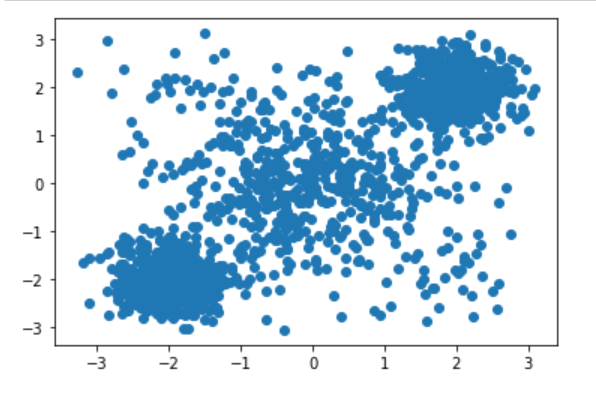

##### Dataset 2
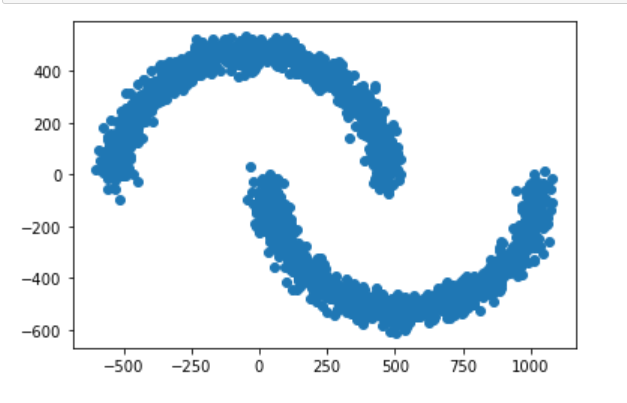

##### Dataset 3
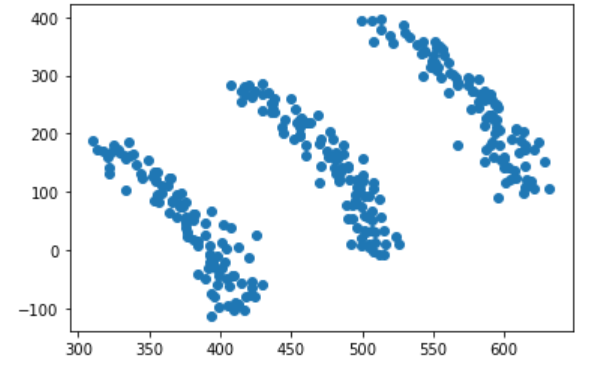

##### Dataset 4
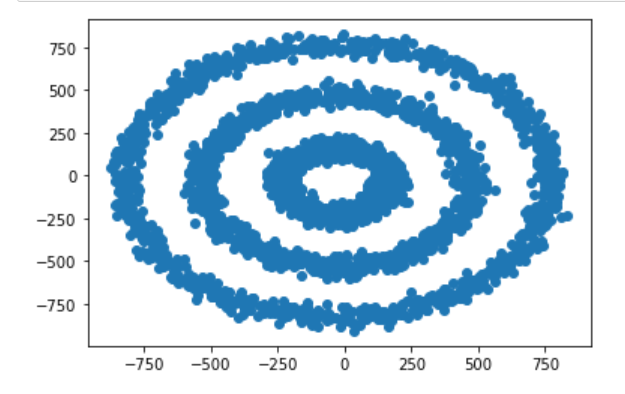

##### Dataset 5
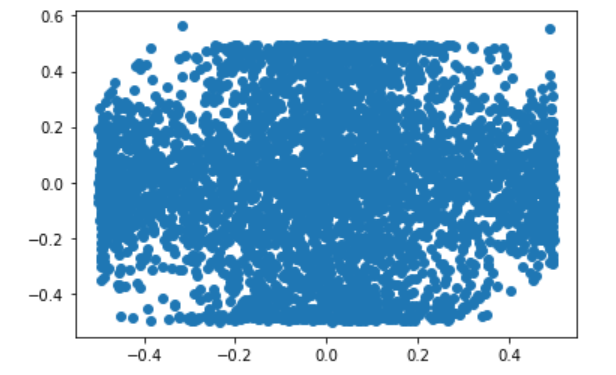

In [172]:
# Number of Nodes Equal to Roll Number
Rollnumber = '20L-1309'
roll_no = Rollnumber.split('-')
roll_no = roll_no[1]
roll_no = int(roll_no)

In [173]:
# Function to calculate Purity
def purity_score(y_true, y_pred):

    # computing confusion matrix
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)

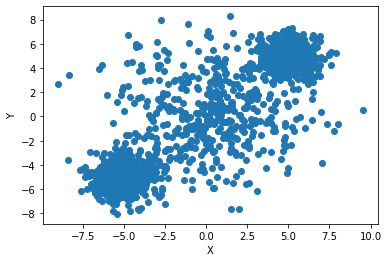

In [174]:
X1, y1 = make_blobs(n_samples=roll_no, n_features=2, cluster_std=[1, 3, 1], centers=[[-5,-5],[0,0], [5,5]], random_state=0)

plt.scatter(X1[:,0], X1[:,1])
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

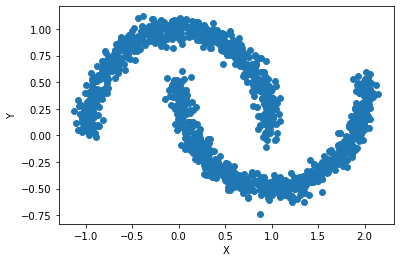

In [175]:
X2, y2 = make_moons(n_samples=roll_no, shuffle=False, noise=0.06)

plt.scatter(X2[:, 0], X2[:, 1], s = 35)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

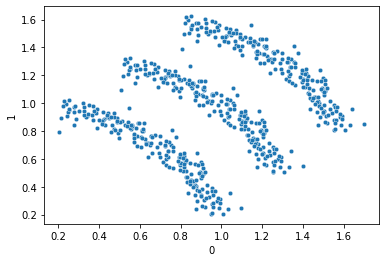

In [176]:
X3,x =make_circles(n_samples=1113, noise=0.05,factor=0.99)
X3=X3[(X3[:,0]>.2) & (X3[:,1]>.2)]
X3=np.c_[np.r_[X3,X3+.3,X3+.6],np.r_[X3*0,X3*0+1,X3*0+2]]
data3=pd.DataFrame(X3)
sns.scatterplot(data=data3,x=0,y=1,s=20);

<AxesSubplot:xlabel='0', ylabel='1'>

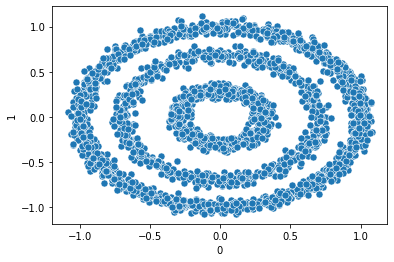

In [177]:
x1, y1 = make_circles(n_samples=roll_no, factor=0.7, noise=0.04)
x2, y2 = make_circles(n_samples=roll_no, factor=0.3, noise=0.04)
df4 = pd.DataFrame(np.vstack([x1,x2]), columns=[0,1])
y2[y2==1]=2
df4['output'] = np.hstack([y1,y2])
sns.scatterplot(data=df4, x=0, y=1, s=50)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


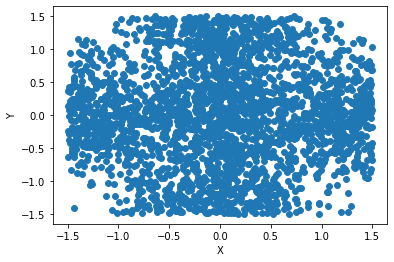

In [178]:
X5, y5 = make_blobs(n_samples=1309 * 3, n_features=2, cluster_std=0.7, centers=[[2, 0], [-2, 0], [0, -2], [0, 2], [0, 0]], random_state=0, )

X5_1 = pd.DataFrame(X5)
X5_1['Output'] = y5
X5_1 = StandardScaler().fit_transform(X5_1)


x = X5_1[:,0]
y = X5_1[:,1]

x = (x<1.5) & (x>-1.5)
y = (y<1.5) & (y>-1.5)
X5_1 = X5_1[x & y]

plt.scatter(X5_1[:,0], X5_1[:,1], s=35)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

# Task2 (Time+ Purity + Plot):
Nice work! Pat on you shoulder

#### Part(A)

Now lets use all of learnt functions from previous labs and apply each and every one of them on these 5 datasets.

1. Kmean
2. Aglomerative (single linkage)
3. Aglomerative (Avg linkage)
4. Aglomerative (Complete linkage)
5. Dbscan

You also need to print purity at the end of each plot & don't forget to report the time it takes by each algo in each

After each output state your conclusive sentence about it



### Note: There are total 25 outputs, each with 2 fields (time & purity). Displaying output with default colors would results in 0 for that section

The time of plot is 0.0701s
Purity of Clusters is 0.5057295645530939


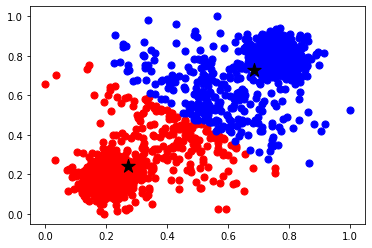

'\nK Mean is not suited for this data set as clusters are of varying sizes and density\n'

In [179]:
# K mean - case 1
# Code which output time, purity, distinguishable plot
#conclusive line

t0 = time.time()    # To calculate time

df1 = pd.DataFrame(X1)
df1.columns = ['X', 'Y']

# Normalization
df1.iloc[:,0] = (df1.iloc[:,0]-min(df1.iloc[:,0]))/(max(df1.iloc[:,0]-min(df1.iloc[:,0])))
df1.iloc[:,1] = (df1.iloc[:,1]-min(df1.iloc[:,1]))/(max(df1.iloc[:,1]-min(df1.iloc[:,1])))

# K-Mean Algorithm
kmeans = KMeans(n_clusters=2) # Choose the no. of clusters using elbow method
kmeans.fit(df1)
clusters = kmeans.cluster_centers_
y_predicted = kmeans.fit_predict(df1)

t1 = time.time()

# Plotting data sets
plt.scatter(df1.iloc[y_predicted == 0, 0], df1.iloc[y_predicted == 0, 1], s=50, color='red')
plt.scatter(df1.iloc[y_predicted == 1, 0], df1.iloc[y_predicted == 1, 1], s=50, color='blue')

# Plotting Markers
plt.scatter(clusters[0][0], clusters[0][1], marker='*', s=200, color='black')
plt.scatter(clusters[1][0], clusters[1][1], marker='*', s=200, color='black')

print("The time of plot is %.4fs" %(t1-t0))
print("Purity of Clusters is", purity_score(y1, y_predicted))
plt.show()

"""
K Mean is not suited for this data set as clusters are of varying sizes and density
"""

The time of plot is 0.0632s
Purity of Clusters is 0.5080213903743316


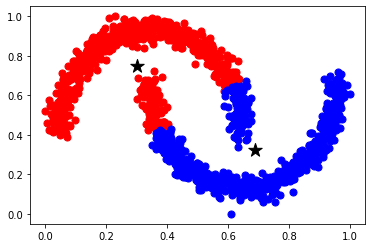

'\nK Mean is suited for this data set as it is used to used to warm-start the positions of centroids\n'

In [180]:
# K mean - case 2
# Code which output time, purity, distinguishable plot
#conclusive line

t0 = time.time()  # To calculate time

df2 = pd.DataFrame(X2)
df2.columns = ['X', 'Y']

# Normalization
df2.iloc[:,0] = (df2.iloc[:,0]-min(df2.iloc[:,0]))/(max(df2.iloc[:,0]-min(df2.iloc[:,0])))
df2.iloc[:,1] = (df2.iloc[:,1]-min(df2.iloc[:,1]))/(max(df2.iloc[:,1]-min(df2.iloc[:,1])))

# K-Mean Algorithm
kmeans = KMeans(n_clusters=2) # Choose the no. of clusters using elbow method
kmeans.fit(df2)
clusters = kmeans.cluster_centers_
y_predicted = kmeans.fit_predict(df2)

t1 = time.time()

# Plotting data sets
plt.scatter(df2.iloc[y_predicted == 0, 0], df2.iloc[y_predicted == 0, 1], s=50, color='red')
plt.scatter(df2.iloc[y_predicted == 1, 0], df2.iloc[y_predicted == 1, 1], s=50, color='blue')

# Plotting Markers
plt.scatter(clusters[0][0], clusters[0][1], marker='*', s=200, color='black')
plt.scatter(clusters[1][0], clusters[1][1], marker='*', s=200, color='black')

print("The time of plot is %.4fs" %(t1-t0))
print("Purity of Clusters is", purity_score(y2, y_predicted))
plt.show()

"""
K Mean is suited for this data set as it is used to used to warm-start the positions of centroids
"""

The time of plot is 0.0349s
Purity of Clusters is 1.0


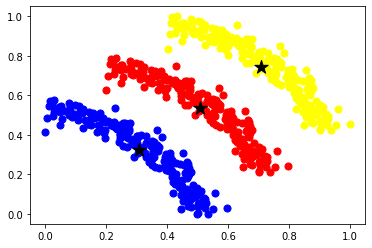

'\nK Mean is suited for large data sets\n'

In [181]:
# K mean - case 3
# Code which output  time, purity, distinguishable plot
#conclusive line

t0 = time.time()  # To calculate time

df3 = pd.DataFrame(data3)
df3.columns = ['X', 'Y','Output1', 'Output2']

# Normalization
df3.iloc[:,0] = (df3.iloc[:,0]-min(df3.iloc[:,0]))/(max(df3.iloc[:,0]-min(df3.iloc[:,0])))
df3.iloc[:,1] = (df3.iloc[:,1]-min(df3.iloc[:,1]))/(max(df3.iloc[:,1]-min(df3.iloc[:,1])))

# K-Mean Algorithm
kmeans = KMeans(n_clusters=3) # Choose the no. of clusters using elbow method
kmeans.fit(df3)
clusters = kmeans.cluster_centers_
y_predicted = kmeans.fit_predict(df3)

t1 = time.time()

# Plotting data sets
plt.scatter(df3.iloc[y_predicted == 0, 0], df3.iloc[y_predicted == 0, 1], s=50, color='red')
plt.scatter(df3.iloc[y_predicted == 1, 0], df3.iloc[y_predicted == 1, 1], s=50, color='blue')
plt.scatter(df3.iloc[y_predicted == 2, 0], df3.iloc[y_predicted == 2, 1], s=50, color='yellow')

# Plotting Markers
plt.scatter(clusters[0][0], clusters[0][1], marker='*', s=200, color='black')
plt.scatter(clusters[1][0], clusters[1][1], marker='*', s=200, color='black')
plt.scatter(clusters[2][0], clusters[2][1], marker='*', s=200, color='black')

print("The time of plot is %.4fs" %(t1-t0))
print("Purity of Clusters is", purity_score(df3['Output1'], df3['Output2']))
plt.show()

"""
K Mean is suited for large data sets
"""

The time of plot is 0.1231s
Purity of Clusters is 1.0


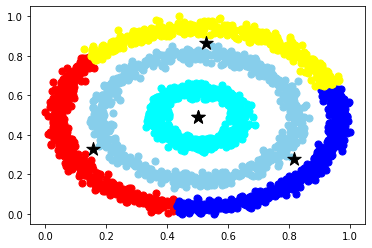

'\nK Mean is suited for large data sets also purity for this data set is 100%\n'

In [182]:
# K mean - case 4
# Code which output time, purity, distinguishable plot
#conclusive line

t0 = time.time()  # To calculate time

df4.columns = ['X', 'Y', 'Output']

# Normalization
df4.iloc[:,0] = (df4.iloc[:,0]-min(df4.iloc[:,0]))/(max(df4.iloc[:,0]-min(df4.iloc[:,0])))
df4.iloc[:,1] = (df4.iloc[:,1]-min(df4.iloc[:,1]))/(max(df4.iloc[:,1]-min(df4.iloc[:,1])))
df4.iloc[:,2] = (df4.iloc[:,2]-min(df4.iloc[:,2]))/(max(df4.iloc[:,2]-min(df4.iloc[:,2])))

# K-Mean Algorithm
kmeans = KMeans(n_clusters=5) # Choose the no. of clusters using elbow method
kmeans.fit(df4)
clusters = kmeans.cluster_centers_
y_predicted = kmeans.fit_predict(df4)

t1 = time.time()

# Plotting data sets
plt.scatter(df4.iloc[y_predicted == 0, 0], df4.iloc[y_predicted == 0, 1], s=50, color='red')
plt.scatter(df4.iloc[y_predicted == 1, 0], df4.iloc[y_predicted == 1, 1], s=50, color='blue')
plt.scatter(df4.iloc[y_predicted == 2, 0], df4.iloc[y_predicted == 2, 1], s=50, color='yellow')
plt.scatter(df4.iloc[y_predicted == 3, 0], df4.iloc[y_predicted == 3, 1], s=50, color='cyan')
plt.scatter(df4.iloc[y_predicted == 4, 0], df4.iloc[y_predicted == 4, 1], s=50, color='skyblue')

# Plotting Markers
plt.scatter(clusters[0][0], clusters[0][1], marker='*', s=200, color='black')
plt.scatter(clusters[1][0], clusters[1][1], marker='*', s=200, color='black')
plt.scatter(clusters[2][0], clusters[2][1], marker='*', s=200, color='black')
plt.scatter(clusters[3][0], clusters[3][1], marker='*', s=200, color='black')
plt.scatter(clusters[4][0], clusters[4][1], marker='*', s=200, color='black')

print("The time of plot is %.4fs" %(t1-t0))
print("Purity of Clusters is", purity_score(df4['Output'], y_predicted))
plt.show()

"""
K Mean is suited for large data sets also purity for this data set is 100%
"""

The time of plot is 0.0606s
Purity of Clusters is 1.0


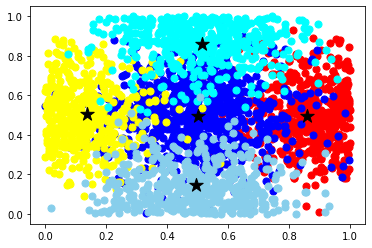

'\nK Mean is suited for large data sets and also the purity for this data set is 100%\n'

In [183]:
# K mean - case 5
# Code which output time, purity, distinguishable plot
#conclusive line

t0 = time.time()  # To calculate time

df5 = pd.DataFrame(X5_1)
df5.columns = ['X', 'Y','Output1']

# Normalization
df5.iloc[:,0] = (df5.iloc[:,0]-min(df5.iloc[:,0]))/(max(df5.iloc[:,0]-min(df5.iloc[:,0])))
df5.iloc[:,1] = (df5.iloc[:,1]-min(df5.iloc[:,1]))/(max(df5.iloc[:,1]-min(df5.iloc[:,1])))

# K-Mean Algorithm
kmeans = KMeans(n_clusters=5) # Choose the no. of clusters using elbow method
kmeans.fit(df5)
clusters = kmeans.cluster_centers_
y_predicted = kmeans.fit_predict(X5_1)

t1 = time.time()

# Plotting data sets
plt.scatter(df5.iloc[y_predicted == 0, 0], df5.iloc[y_predicted == 0, 1], s=50, color='red')
plt.scatter(df5.iloc[y_predicted == 1, 0], df5.iloc[y_predicted == 1, 1], s=50, color='blue')
plt.scatter(df5.iloc[y_predicted == 2, 0], df5.iloc[y_predicted == 2, 1], s=50, color='yellow')
plt.scatter(df5.iloc[y_predicted == 3, 0], df5.iloc[y_predicted == 3, 1], s=50, color='cyan')
plt.scatter(df5.iloc[y_predicted == 4, 0], df5.iloc[y_predicted == 4, 1], s=50, color='skyblue')

# Plotting Markers
plt.scatter(clusters[0][0], clusters[0][1], marker='*', s=200, color='black')
plt.scatter(clusters[1][0], clusters[1][1], marker='*', s=200, color='black')
plt.scatter(clusters[2][0], clusters[2][1], marker='*', s=200, color='black')
plt.scatter(clusters[3][0], clusters[3][1], marker='*', s=200, color='black')
plt.scatter(clusters[4][0], clusters[4][1], marker='*', s=200, color='black')

print("The time of plot is %.4fs" %(t1-t0))
print("Purity of Clusters is", purity_score(df5['Output1'], y_predicted))
plt.show()

"""
K Mean is suited for large data sets and also the purity for this data set is 100%
"""

8.51 ms ± 29.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Purity of Clusters is 0.5011459129106188


'\nWould not recommend this method because it cannot differentiate between clusters\nIt has taken all the data sets into one large cluster\n'

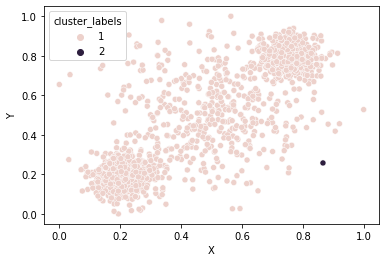

In [184]:
# Aglomerative 1 - case 1
# Code which output time, purity, distinguishable plot 
#conclusive line

distance_matrix = linkage(df1[['X', 'Y']], method='single', metric='euclidean')
df1['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')
sns.scatterplot(x='X', y='Y', hue='cluster_labels', data=df1)

%timeit linkage(df1[['X', 'Y']], method='single', metric='euclidean')

print("Purity of Clusters is", purity_score(y1, df1['cluster_labels']))

"""
Would not recommend this method because it cannot differentiate between clusters
It has taken all the data sets into one large cluster
"""

5.57 ms ± 49 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Purity of Clusters is 0.5103132161955691


'\nFor this type of dataset this method can be considered okay.\nAs it is differentiating between the clusters but the purity is still 5-%\n'

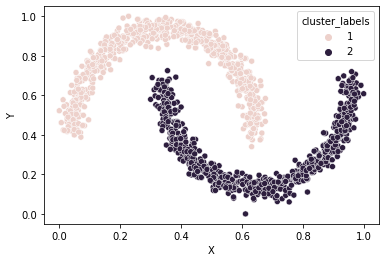

In [185]:
# Aglomerative 1 - case 2
# Code which output time, purity, distinguishable plot
#conclusive line

distance_matrix = linkage(df2[['X', 'Y']], method='single', metric='euclidean')
df2['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')
sns.scatterplot(x='X', y='Y', hue='cluster_labels', data=df2)

%timeit linkage(df2[['X', 'Y']], method='single', metric='euclidean')

print("Purity of Clusters is", purity_score(y2, df2['cluster_labels']))

"""
For this type of dataset this method can be considered okay.
As it is differentiating between the clusters but the purity is still 5-%
"""

1.8 ms ± 270 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
Purity of Clusters is 1.0


'\nFor this type of dataset this method can be considered good.\n'

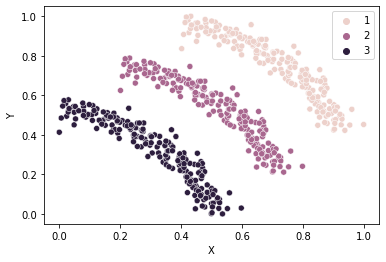

In [186]:
# Aglomerative 1 - case 3
# Code which output time, purity, distinguishable plot
#conclusive line

distance_matrix = linkage(df3[['X', 'Y']], method='single', metric='euclidean')
temp = fcluster(distance_matrix, 3, criterion='maxclust')
sns.scatterplot(x='X', y='Y', hue=temp, data=df3)

%timeit linkage(df3[['X', 'Y']], method='single', metric='euclidean')
print("Purity of Clusters is", purity_score(df3['Output1'], temp))

"""
For this type of dataset this method can be considered good.
"""

28.5 ms ± 159 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
Purity of Clusters is 1.0


'\nFor this type of dataset this method can be considered good.\n'

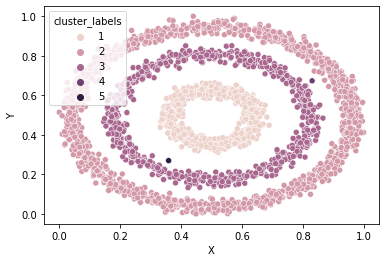

In [187]:
# Aglomerative 1 - case 4
# Code which output time, purity, distinguishable plot
#conclusive line

distance_matrix = linkage(df4[['X', 'Y']], method='single', metric='euclidean')
df4['cluster_labels'] = fcluster(distance_matrix, 5, criterion='maxclust')
sns.scatterplot(x='X', y='Y', hue='cluster_labels', data=df4)

%timeit linkage(df4[['X', 'Y']], method='single', metric='euclidean')

print("Purity of Clusters is", purity_score(df4['Output'], df4['cluster_labels']))

"""
For this type of dataset this method can be considered good.
"""

1.67 ms ± 20.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
Purity of Clusters is 0.2967984934086629


'\nFor this type of dataset this method is not considered.\nClusters are not differentiated and is considered into a whole 1 cluster\n'

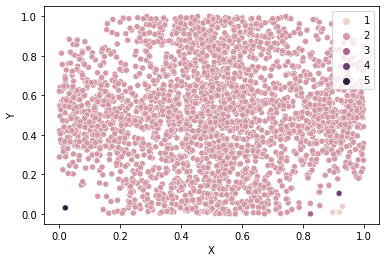

In [188]:
# Aglomerative 1 - case 5
# Code which output time, purity, distinguishable plot
#conclusive line

distance_matrix = linkage(df5[['X', 'Y']], method='single', metric='euclidean')
temp = fcluster(distance_matrix, 5, criterion='maxclust')
sns.scatterplot(x='X', y='Y', hue=temp, data=df5)

%timeit linkage(df3[['X', 'Y']], method='single', metric='euclidean')
print("Purity of Clusters is", purity_score(df5['Output1'], temp))

"""
For this type of dataset this method is not considered.
Clusters are not differentiated and is considered into a whole 1 cluster
"""

8.78 ms ± 152 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Purity of Clusters is 0.5019098548510313


'\nThis Method is can be considered for this type of datasets as\nThough the purity is only 51%\n'

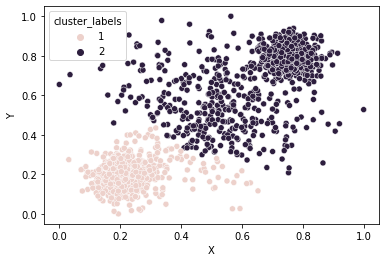

In [189]:
# Aglomerative 2 - case 1
# Code which output time, purity, distinguishable plot 
#conclusive line
distance_matrix = linkage(df1[['X', 'Y']], method='average', metric='euclidean')
df1['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')
sns.scatterplot(x='X', y='Y', hue='cluster_labels', data=df1)

%timeit linkage(df1[['X', 'Y']], method='single', metric='euclidean')

print("Purity of Clusters is", purity_score(y1, df1['cluster_labels']))

"""
This Method is can be considered for this type of datasets as
Though the purity is only 51%
"""

5.8 ms ± 88.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Purity of Clusters is 0.5072574484339191


'\nThis Method is can be considered for this type of datasets as\nThough the purity is only 51%\n'

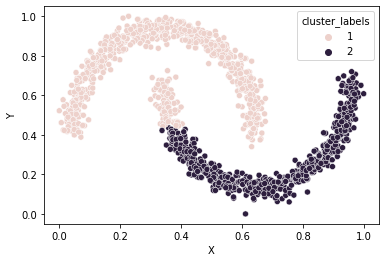

In [190]:
# Aglomerative 2 - case 2
# Code which output time, purity, distinguishable plot 
#conclusive line

distance_matrix = linkage(df2[['X', 'Y']], method='average', metric='euclidean')
df2['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')
sns.scatterplot(x='X', y='Y', hue='cluster_labels', data=df2)

%timeit linkage(df2[['X', 'Y']], method='single', metric='euclidean')

print("Purity of Clusters is", purity_score(y2, df2['cluster_labels']))

"""
This Method is can be considered for this type of datasets as
Though the purity is only 51%
"""

1.65 ms ± 24.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
Purity of Clusters is 0.6666666666666666


'\nThis Method is considered for this type of datasets as\nThough the purity is only 66%\n'

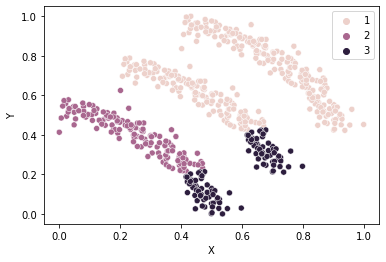

In [191]:
# Aglomerative 2 - case 3
# Code which output time, purity, distinguishable plot 
#conclusive line

distance_matrix = linkage(df3[['X', 'Y']], method='average', metric='euclidean')
temp = fcluster(distance_matrix, 3, criterion='maxclust')
sns.scatterplot(x='X', y='Y', hue=temp, data=df3)

%timeit linkage(df3[['X', 'Y']], method='single', metric='euclidean')
print("Purity of Clusters is", purity_score(df3['Output1'], temp))

"""
This Method is considered for this type of datasets as
Though the purity is only 66%
"""

28.5 ms ± 316 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
Purity of Clusters is 0.7498090145148969


'\nThis Method is better than rest as  the purity is 74%%\n'

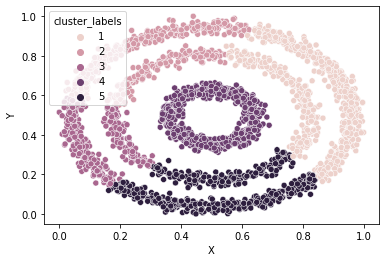

In [192]:
# Aglomerative 2 - case 4
# Code which output time, purity, distinguishable plot 
#conclusive line

distance_matrix = linkage(df4[['X', 'Y']], method='average', metric='euclidean')
df4['cluster_labels'] = fcluster(distance_matrix, 5, criterion='maxclust')
sns.scatterplot(x='X', y='Y', hue='cluster_labels', data=df4)

%timeit linkage(df4[['X', 'Y']], method='single', metric='euclidean')

print("Purity of Clusters is", purity_score(df4['Output'], df4['cluster_labels']))

"""
This Method is better than rest as  the purity is 74%%
"""

1.66 ms ± 15.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
Purity of Clusters is 0.7386064030131827


'\nThis Method is better than single as the purity is 73%%\n'

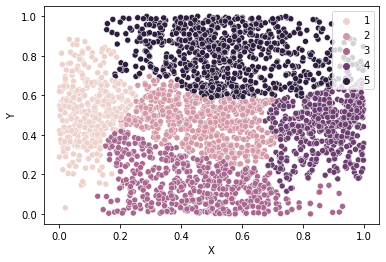

In [193]:
# Aglomerative 2 - case 5
# Code which output time, purity, distinguishable plot 
#conclusive line

distance_matrix = linkage(df5[['X', 'Y']], method='average', metric='euclidean')
temp = fcluster(distance_matrix, 5, criterion='maxclust')
sns.scatterplot(x='X', y='Y', hue=temp, data=df5)

%timeit linkage(df3[['X', 'Y']], method='single', metric='euclidean')
print("Purity of Clusters is", purity_score(df5['Output1'], temp))

"""
This Method is better than single as the purity is 73%%
"""

8.65 ms ± 155 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Purity of Clusters is 0.5019098548510313


'\nThis Method can be considered better than rest as  the purity is 74%%\n'

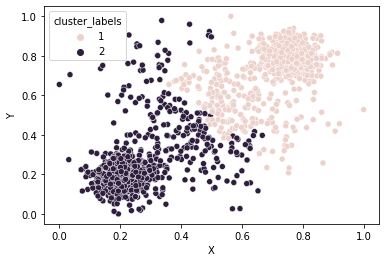

In [194]:
# Aglomerative 3 - case 1
# Code which output time, purity, distinguishable plot 
#conclusive line

distance_matrix = linkage(df1[['X', 'Y']], method='complete', metric='euclidean')
df1['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')
sns.scatterplot(x='X', y='Y', hue='cluster_labels', data=df1)

%timeit linkage(df1[['X', 'Y']], method='single', metric='euclidean')

print("Purity of Clusters is", purity_score(y1, df1['cluster_labels']))

"""
This Method can be considered better than rest as  the purity is 74%%
"""

5.68 ms ± 115 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Purity of Clusters is 0.5080213903743316


'\nThis Method can be considered better but it is rather time taking\n'

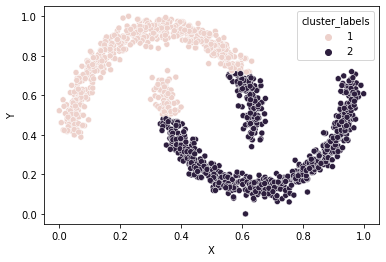

In [195]:
# Aglomerative 3 - case 2
# Code which output time, purity, distinguishable plot
#conclusive line

distance_matrix = linkage(df2[['X', 'Y']], method='complete', metric='euclidean')
df2['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')
sns.scatterplot(x='X', y='Y', hue='cluster_labels', data=df2)

%timeit linkage(df2[['X', 'Y']], method='single', metric='euclidean')

print("Purity of Clusters is", purity_score(y2, df2['cluster_labels']))
"""
This Method can be considered better but it is rather time taking
"""

1.67 ms ± 18.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
Purity of Clusters is 0.6666666666666666


'\nThis Method can be considered better but it is fast\n'

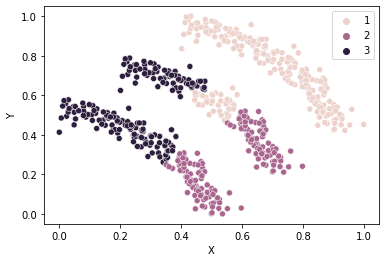

In [196]:
# Aglomerative 3 - case 3
# Code which output time, purity, distinguishable plot 
#conclusive line

distance_matrix = linkage(df3[['X', 'Y']], method='complete', metric='euclidean')
temp = fcluster(distance_matrix, 3, criterion='maxclust')
sns.scatterplot(x='X', y='Y', hue=temp, data=df3)

%timeit linkage(df3[['X', 'Y']], method='single', metric='euclidean')
print("Purity of Clusters is", purity_score(df3['Output1'], temp))
"""
This Method can be considered better but it is fast
"""

29.1 ms ± 456 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
Purity of Clusters is 0.5771581359816654


'\nThis Method can be considered better but it is rather very time taking\n'

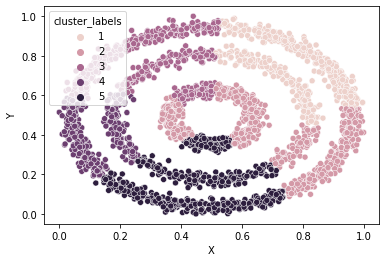

In [197]:
# Aglomerative 3 - case 4
# Code which output time, purity, distinguishable plot 
#conclusive line
distance_matrix = linkage(df4[['X', 'Y']], method='complete', metric='euclidean')
df4['cluster_labels'] = fcluster(distance_matrix, 5, criterion='maxclust')
sns.scatterplot(x='X', y='Y', hue='cluster_labels', data=df4)

%timeit linkage(df4[['X', 'Y']], method='single', metric='euclidean')

print("Purity of Clusters is", purity_score(df4['Output'], df4['cluster_labels']))

"""
This Method can be considered better but it is rather very time taking
"""

1.65 ms ± 18.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
Purity of Clusters is 0.487758945386064


'\nThis Method can be considered better but it is fast\n'

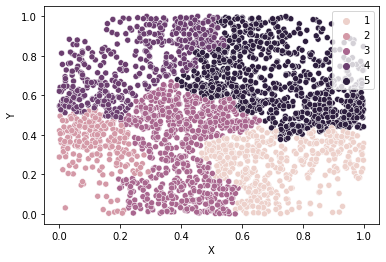

In [198]:
# Aglomerative 3 - case 5
# Code which output time, purity, distinguishable plot 
#conclusive line

distance_matrix = linkage(df5[['X', 'Y']], method='complete', metric='euclidean')
temp = fcluster(distance_matrix, 5, criterion='maxclust')
sns.scatterplot(x='X', y='Y', hue=temp, data=df5)

%timeit linkage(df3[['X', 'Y']], method='single', metric='euclidean')
print("Purity of Clusters is", purity_score(df5['Output1'], temp))

"""
This Method can be considered better but it is fast
"""

Estimated number of clusters: 2
Estimated number of noise points: 391
The time of plot is 0.0254s
Purity of Clusters is 0.5110771581359816


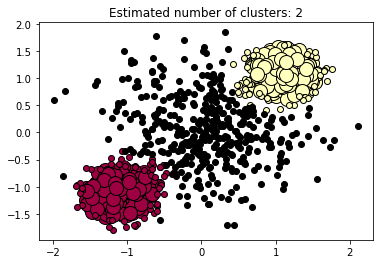

In [199]:
# Dbscan - case 1
# Code which output time, purity, distinguishable plot
#conclusive line

t0 = time.time()
standarized_X1 = StandardScaler().fit_transform(X1)

db = DBSCAN(eps=0.3, min_samples=60)
clusters = db.fit_predict(standarized_X1)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = standarized_X1[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = standarized_X1[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )
t1 = time.time()
plt.title("Estimated number of clusters: %d" % n_clusters_)
print("The time of plot is %.4fs" %(t1-t0))
print("Purity of Clusters is", purity_score(y1, clusters))
plt.show()


Estimated number of clusters: 3
Estimated number of noise points: 61
The time of plot is 0.0185s
Purity of Clusters is 0.5110771581359816


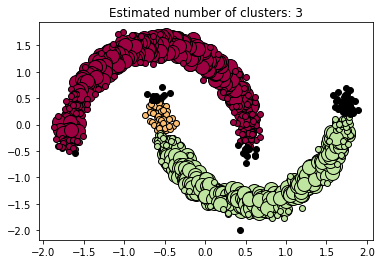

In [200]:
# Dbscan - case 2
# Code which output time, purity, distinguishable plot
#conclusive line

t0 = time.time()
standarized_X2 = StandardScaler().fit_transform(X2)

db = DBSCAN(eps=0.3, min_samples=60)
clusters = db.fit_predict(standarized_X2)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = standarized_X2[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = standarized_X2[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )
t1 = time.time()
plt.title("Estimated number of clusters: %d" % n_clusters_)
print("The time of plot is %.4fs" %(t1-t0))
print("Purity of Clusters is", purity_score(y2, clusters))
plt.show()

Estimated number of clusters: 3
Estimated number of noise points: 45
The time of plot is 0.0159s
Purity of Clusters is 0.95


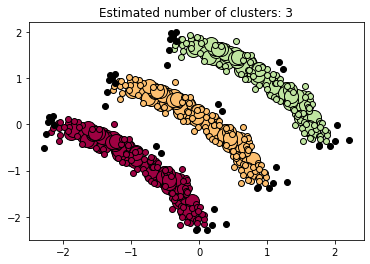

In [201]:
# Dbscan - case 3
# Code which output time, purity, distinguishable plot
#conclusive line

t0 = time.time()
standarized_X3 = StandardScaler().fit_transform(data3)

db = DBSCAN(eps=0.3, min_samples=30)
clusters = db.fit_predict(standarized_X3)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = standarized_X3[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = standarized_X3[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )
t1 = time.time()
plt.title("Estimated number of clusters: %d" % n_clusters_)
print("The time of plot is %.4fs" %(t1-t0))
print("Purity of Clusters is", purity_score(df3['Output1'], clusters))
plt.show()

Estimated number of clusters: 9
Estimated number of noise points: 655
The time of plot is 0.0374s
Purity of Clusters is 1.0


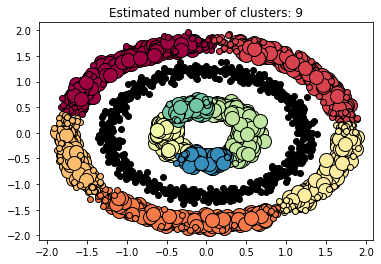

In [202]:
# Dbscan - case 4
# Code which output time, purity, distinguishable plot 
#conclusive line

t0 = time.time()
standarized_X4 = StandardScaler().fit_transform(df4)

db = DBSCAN(eps=0.3, min_samples=60)
clusters = db.fit_predict(standarized_X4)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = standarized_X4[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = standarized_X4[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )
t1 = time.time()
plt.title("Estimated number of clusters: %d" % n_clusters_)
print("The time of plot is %.4fs" %(t1-t0))
print("Purity of Clusters is", purity_score(df4['Output'], clusters))
plt.show()

Estimated number of clusters: 5
Estimated number of noise points: 352
The time of plot is 0.0321s
Purity of Clusters is 0.9084745762711864


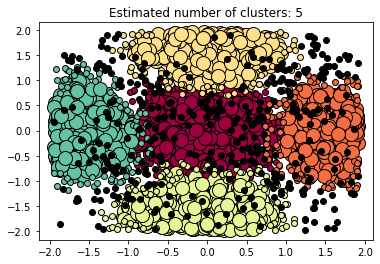

In [203]:
# Dbscan - case 5
# Code which output time, purity, distinguishable plot
#conclusive line

t0 = time.time()
standarized_X5 = StandardScaler().fit_transform(df5)

db = DBSCAN(eps=0.3, min_samples=30)
clusters = db.fit_predict(standarized_X5)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = standarized_X5[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = standarized_X5[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )
t1 = time.time()
plt.title("Estimated number of clusters: %d" % n_clusters_)
print("The time of plot is %.4fs" %(t1-t0))
print("Purity of Clusters is", purity_score(df5['Output1'], clusters))
plt.show()